In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [3]:
df.shape

(21759, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.drop(columns='City or Regency', axis=1, inplace=True)

In [8]:
df.shape

(21759, 37)

In [9]:
df['Date'].max(), df['Date'].min()

(Timestamp('2021-12-03 00:00:00'), Timestamp('2020-03-01 00:00:00'))

In [10]:
df[
    (df['Date'] >= '2020-12-01') &
    (df['Date'] < '2021-12-01')
].groupby('Province')['New Cases'].sum()


Province
Aceh                           30122
Bali                          100334
Banten                        119635
Bengkulu                       21280
DKI Jakarta                   727086
Daerah Istimewa Yogyakarta    150787
Gorontalo                       8724
Jambi                          27824
Jawa Barat                    651027
Jawa Tengah                   428707
Jawa Timur                    337497
Kalimantan Barat               39123
Kalimantan Selatan             56717
Kalimantan Tengah              39685
Kalimantan Timur              138615
Kalimantan Utara               34419
Kepulauan Bangka Belitung      51264
Kepulauan Riau                 48424
Lampung                        45859
Maluku                          9966
Maluku Utara                    9728
Nusa Tenggara Barat            23096
Nusa Tenggara Timur            62807
Papua                          24323
Papua Barat                    18091
Riau                          108738
Sulawesi Barat               

In [11]:
df[
    (df['Date'] >= '2020-12-01') &
    (df['Date'] < '2021-12-01')
].groupby('Province')['New Cases'].count()


Province
Aceh                          365
Bali                          365
Banten                        365
Bengkulu                      365
DKI Jakarta                   365
Daerah Istimewa Yogyakarta    365
Gorontalo                     356
Jambi                         365
Jawa Barat                    365
Jawa Tengah                   365
Jawa Timur                    365
Kalimantan Barat              365
Kalimantan Selatan            365
Kalimantan Tengah             365
Kalimantan Timur              365
Kalimantan Utara              365
Kepulauan Bangka Belitung     365
Kepulauan Riau                365
Lampung                       365
Maluku                        365
Maluku Utara                  363
Nusa Tenggara Barat           365
Nusa Tenggara Timur           365
Papua                         365
Papua Barat                   365
Riau                          365
Sulawesi Barat                365
Sulawesi Selatan              365
Sulawesi Tengah               365
Sulaw

In [12]:
df[
    (df['Date'] >= '2020-12-01') &
    (df['Date'] < '2021-12-01') 
].groupby('Province')['New Cases'].mean()


Province
Aceh                            82.526027
Bali                           274.887671
Banten                         327.767123
Bengkulu                        58.301370
DKI Jakarta                   1992.016438
Daerah Istimewa Yogyakarta     413.115068
Gorontalo                       24.505618
Jambi                           76.230137
Jawa Barat                    1783.635616
Jawa Tengah                   1174.539726
Jawa Timur                     924.649315
Kalimantan Barat               107.186301
Kalimantan Selatan             155.389041
Kalimantan Tengah              108.726027
Kalimantan Timur               379.767123
Kalimantan Utara                94.298630
Kepulauan Bangka Belitung      140.449315
Kepulauan Riau                 132.668493
Lampung                        125.641096
Maluku                          27.304110
Maluku Utara                    26.798898
Nusa Tenggara Barat             63.276712
Nusa Tenggara Timur            172.073973
Papua                    

In [28]:
df_dki = df[
    (df['Province'] == 'DKI Jakarta') & 
    (df['Date'] >= '2020-12-01') &
    (df['Date'] < '2021-12-01') 
]['New Cases']

df_jabar = df[
    (df['Province'] == 'Jawa Barat') & 
    (df['Date'] >= '2020-12-01') &
    (df['Date'] < '2021-12-01') 
]['New Cases']

Cek apakah pada rentang waktu 01-12-2020 hingga 01-12-2021, rata-rata **New Cases** harian di Jakarta = rata-rata **New Cases** harian di Jawa Barat. \
Ho : μ_jakarta = μ_jabar \
H1 : μ_jakarta != μ_jabar

In [29]:
df_dki

8937     1058
8972     1166
9007     1153
9042     1032
9077     1360
         ... 
21533      70
21567      54
21601      51
21635      41
21668      44
Name: New Cases, Length: 365, dtype: int64

In [31]:
t_stat, p_val = stats.ttest_ind(df_dki, df_jabar)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.23948418467735372
t-statistics: 1.177240695846592


hasil dari p value adalah 0.23 yang berarti lebih besar dari pada significant level, Sehingga tidak terdapat perbedaan significant yang berarti antara rata-rata jakarta dan rata-rata jawa barat. Hal ini menunjukkan bahwa Ho gagal ditolak dan dapat diterima.

/home/anugrahyogaprt/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/anugrahyogaprt/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


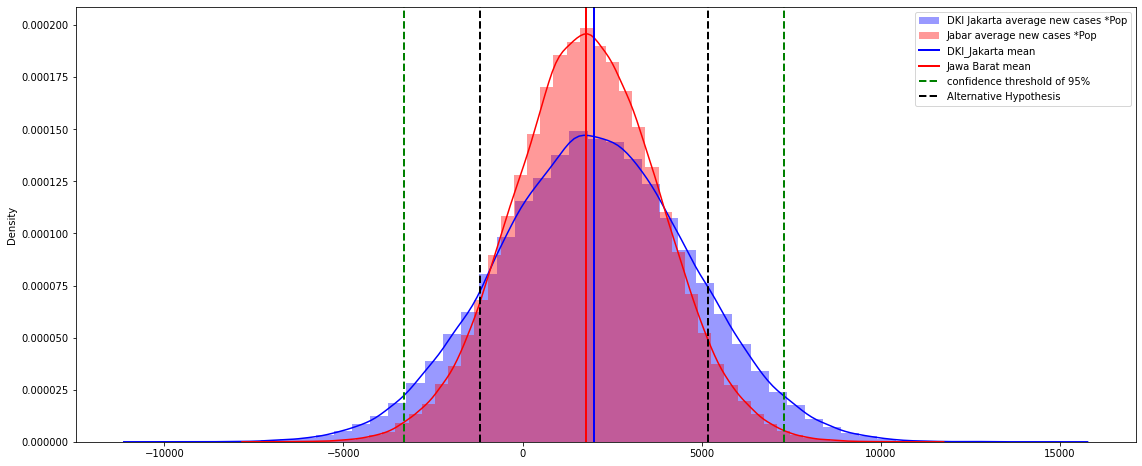

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

dki_pop = np.random.normal(df_dki.mean(), df_dki.std(),100000)
jabar_pop = np.random.normal(df_jabar.mean(),df_jabar.std(),100000)

ci = stats.norm.interval(0.95, df_dki.mean(), df_dki.std())
plt.figure(figsize=(19, 8))
sns.distplot(dki_pop, label='DKI Jakarta average new cases *Pop',color='blue')
sns.distplot(jabar_pop, label='Jabar average new cases *Pop',color='red')

plt.axvline(df_dki.mean(), color='blue', linewidth=2, label='DKI_Jakarta mean')
plt.axvline(df_jabar.mean(), color='red',  linewidth=2, label='Jawa Barat mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(dki_pop.mean()+t_stat*dki_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(dki_pop.mean()-t_stat*dki_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

In [44]:
ci

(-3301.690156425004, 7285.723033137332)